In [52]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [53]:
dataset = pd.read_csv('/kaggle/input/d/waghraj/facebook-ads/Facebook_ads_Data.csv')

In [79]:
import math as m
T = 200
num_ads = 10
ads_selected = []
numbers_of_selections = [0] * num_ads
sum_of_rewards = [0] * num_ads
total_reward = 0

for n in range(0,T):
    ad = 0
    max_UCB = 0
    for i in range(0,num_ads):
        if (numbers_of_selections[i] > 0):
            avg_rewards = sum_of_rewards[i] / numbers_of_selections[i]
            delta_i = m.sqrt( 3/2 * m.log(n+1) / numbers_of_selections[i])
            UCB = avg_rewards + delta_i
        else:
            UCB = 1e400
        if( UCB > max_UCB):
            max_UCB = UCB
            ad = i
    ads_selected.append(ad)
    numbers_of_selections[ad] = numbers_of_selections[ad] +1
    reward = dataset.values[n,ad]
    sum_of_rewards[ad] = sum_of_rewards[ad] + reward
    total_reward = total_reward + 1
    

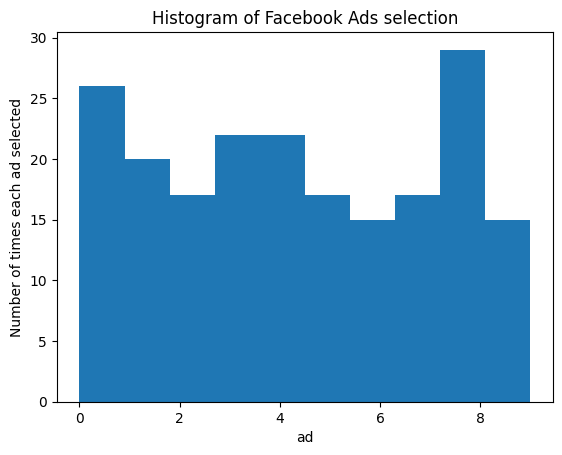

In [80]:
plt.hist(ads_selected)
plt.title('Histogram of Facebook Ads selection')
plt.xlabel('ad')
plt.ylabel('Number of times each ad selected')
plt.show()